<a href="https://colab.research.google.com/github/MattJorgensen95/python_final/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I'm revisiting the crocodile dataset from my Excel final project, but this time using Python.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/MattJorgensen95/python_final/refs/heads/main/crocodile_dataset.csv')
df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


# This dataset didn't require much cleaning. The only thing I had to do was drop the Notes column because it was just a bunch of gibberish for some reason.

In [108]:
df = df.drop(columns='Notes')

# I decided to focus on the time aspect of this dataset since I wasn't able to include it in my Excel project due to formatting issues.

#I started by adding a year column and making a line plot to show the amount of crocodiles observed each year.

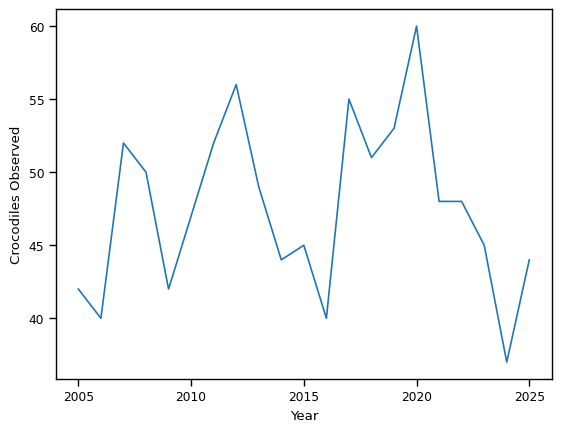

In [109]:
# Adding a year column and seeing how many observations were made per year
df['Year of Observation'] = df['Date of Observation'].str[6:].astype('int')
year_counts = df['Year of Observation'].value_counts().reset_index().sort_values(by='Year of Observation')

sns.lineplot(data=year_counts, x='Year of Observation', y='count')
plt.xticks([2005, 2010, 2015, 2020, 2025])
plt.xlabel('Year')
plt.ylabel('Crocodiles Observed')
plt.show()

# Then I took a look at the descriptive statistics of these yearly observations.

- The average amount of observations per year was 48.
- The mean was also 48.
- 2020 had the highest number of observations: 60 crocodiles.

In [110]:
year_counts.describe()

,Year of Observation,count
count,21.000000,21.000000
mean,2015.000000,47.619048
std,6.204837,5.903187
min,2005.000000,37.000000
25%,2010.000000,44.000000
50%,2015.000000,48.000000
75%,2020.000000,52.000000
max,2025.000000,60.000000


# Next I wanted to see how many of each species were observed each year.
# I quickly realized that the line plot showing this was practically unreadable due to the number of species there are, so I focused on just the critically endangered ones instead.
I had a hard time making a pretty line plot, even with the smaller group of species. I grouped the observation counts into 5 year increments, which helped a lot, but it also added the issue of the 2025 counts dropping significantly because they only covered about a tenth of the observation time as the other increments.

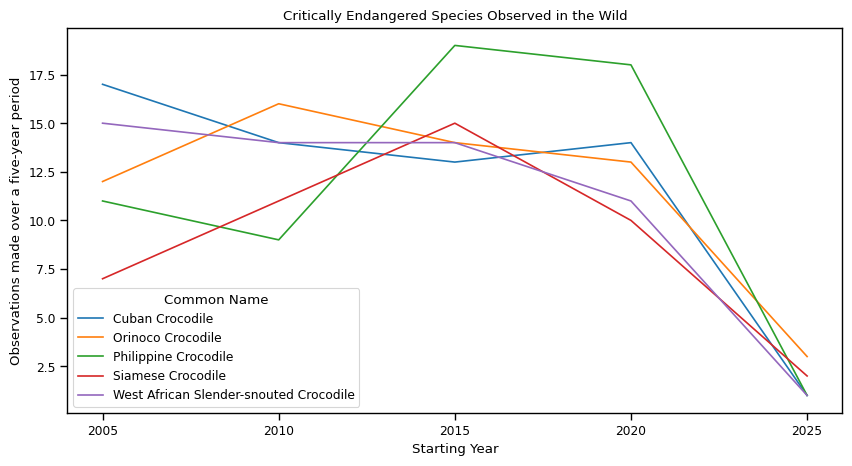

In [111]:
df['Years in Fives'] = (df['Year of Observation']/5).astype('int')*5

plt.figure(figsize=(10,5))
critical = df[df['Conservation Status']=='Critically Endangered']
critical = critical.groupby(['Years in Fives', 'Common Name']).agg({'Observation ID':'count'}).reset_index()
sns.lineplot(data=critical, x='Years in Fives', y='Observation ID', hue='Common Name', legend=True)
plt.xticks([2005, 2010, 2015, 2020, 2025])
plt.title('Critically Endangered Species Observed in the Wild')
plt.xlabel('Starting Year')
plt.ylabel('Observations made over a five-year period')
plt.show()


# The five-year increment graph had its issues, so I wanted to make a better visual of the endangered species counts.

I decided to do this by making a regression model overlaying a scatterplot. It might be a little chaotic at first glance, but it gives both easy-to-see trendlines and the actual data points for each year.

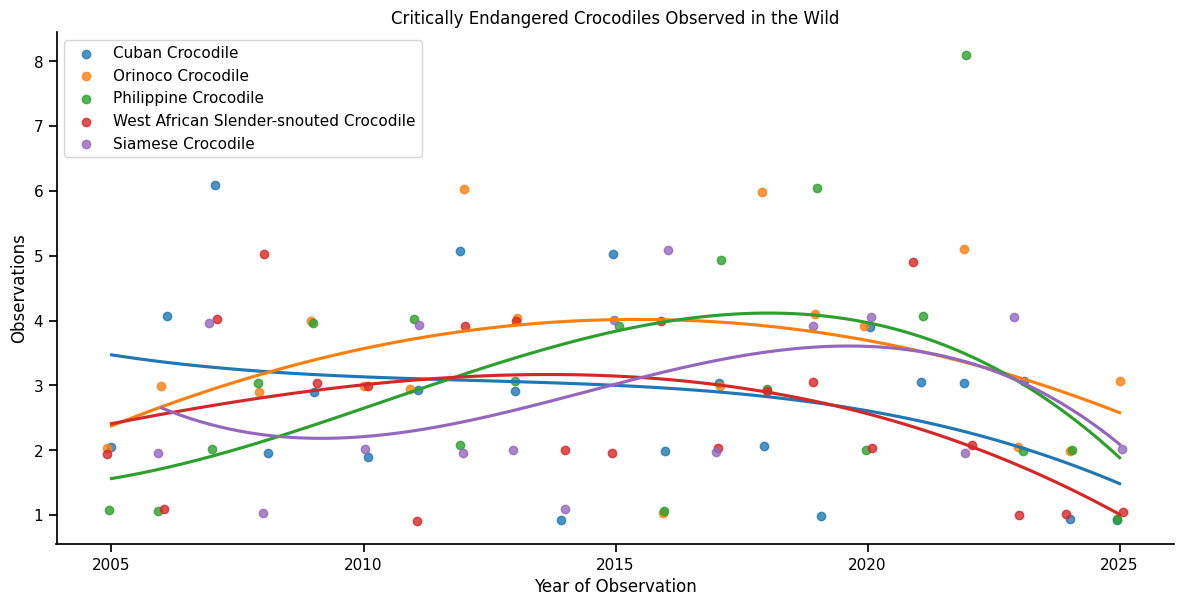

In [112]:
critical = df[df['Conservation Status']=='Critically Endangered']
critical = critical.groupby(['Year of Observation', 'Common Name']).agg({'Observation ID':'count'}).reset_index()

# sns.lmplot(data=critical, x='Year of Observation', y='Observation ID', hue='Common Name', lowess=True, scatter=False, legend=False, height=6, aspect=2)
sns.set_context('notebook')
sns.lmplot(data=critical,
           x='Year of Observation',
           y='Observation ID',
           hue='Common Name',
           scatter=True,
           legend=False,
           height=6,
           aspect=2,
           fit_reg=True,
           ci=False,
           order=3,
           x_jitter=0.1,
           y_jitter=0.1)

plt.legend()
plt.xticks([2005, 2010, 2015, 2020, 2025])
plt.ylabel('Observations')
plt.title('Critically Endangered Crocodiles Observed in the Wild')
plt.show()


# Finally, I decided to visualize the observations of each level of conservation status. This graph was much simpler than the others, just a regular line plot.

What's interesting is that the Critically Endangered counts were mostly higher than the regular Endangered counts, but had a tendancy to grow and plummet dramatically while Endangered counts stayed relatively consistent.

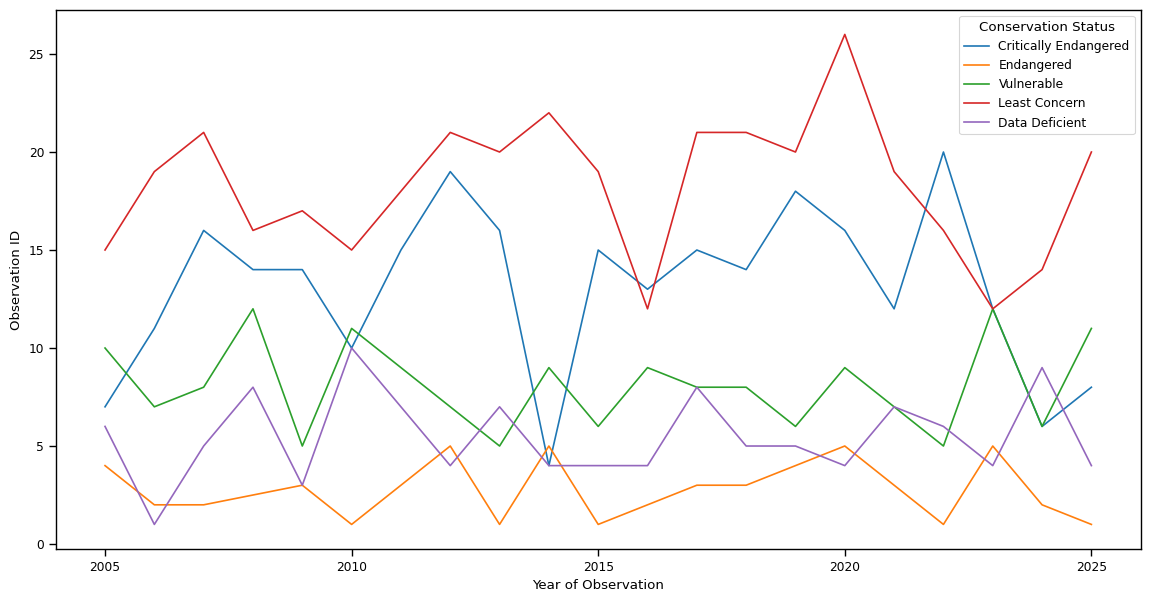

In [113]:
conservation_status_counts = df.groupby(['Conservation Status', 'Year of Observation']).agg({'Observation ID':'count'}).reset_index()
plt.figure(figsize=(14,7))
sns.set_context('paper')
sns.lineplot(data=conservation_status_counts, x='Year of Observation', y='Observation ID', hue='Conservation Status', hue_order=['Critically Endangered', 'Endangered', 'Vulnerable', 'Least Concern', 'Data Deficient']) # If "brief", numeric hue and size variables will be represented with a sample of evenly spaced values. If "full", every group will get an entry in the legend. If "auto", choose between brief or full representation based on number of le
plt.xticks([2005, 2010, 2015, 2020, 2025])
plt.show()
